# GDP and Life Expectancy
Analyze data on GDP and life expectancy (LE) from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Main research question: Relationship between the GDP and life expectancy
  1.  Plot LE vs. GDP for all 6 countries
  2.  Hypothesis testing:  
    +   Null hypothesis: Pearson correleation coefficient is 0.3.   
    +   Alternative hypothesis: is > 0.3.   
    +   Pearson correlation coefficient for all 6 countries.    

Optional questions:  
  1.  Plot LE vs. Year time series for all 6 countries.  
  2.  Plot GDP vs. Year time series for all 6 countries.

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.  
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [21]:
df.shape

(96, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [23]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [24]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LE'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LE       96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


The Plot LE vs. GDP containing all countries does not seem very informative. Since the GDP of the countries are very different, a separate plot for each country would be more descriptive. 

<AxesSubplot:xlabel='GDP', ylabel='LE'>

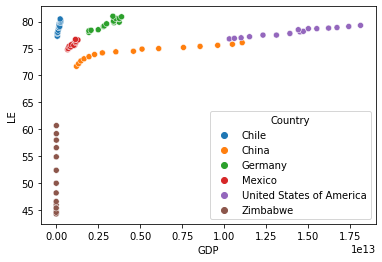

In [25]:
sns.scatterplot(data=df, x="GDP", y="LE", hue="Country")

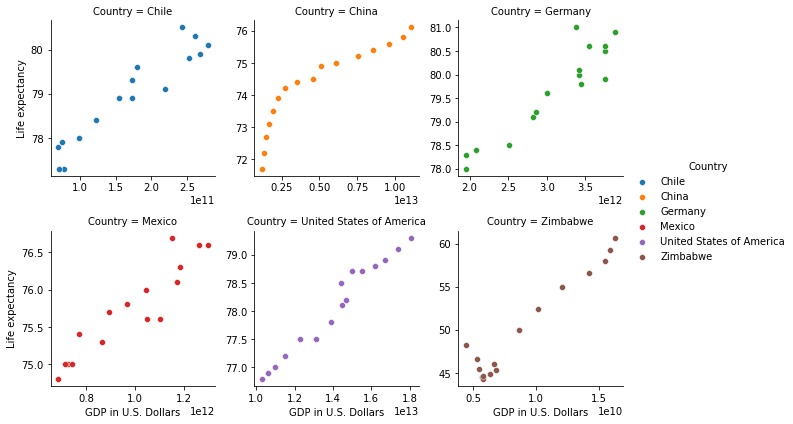

In [26]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"GDP", "LE")
         .add_legend()
         .set_axis_labels("GDP in U.S. Dollars", "Life expectancy"));

All six plots show a positive correlation between Life Expectancy and a country's GDP.  
There is a strong correlation for each country as follows:  
+ Chile: 0.949
+ China: 0.949
+ Germany: 0.909
+ Mexico: 0.933
+ USA: 0.982
+ Zimbabwe: 0.966

In [55]:
corr_alle = np.corrcoef(df.LE, df.GDP)
# print(corr_all)
# The correlation for all countries together is only 0.343.

# Testing commands before the loop
# dfchile = df.loc[(df['Country'] == 'Chile')]
# print(dfchile.head())
# corr_chile = np.corrcoef(dfchile.GDP, dfchile.LE)
# print(corr_chile)

xyz = pd.DataFrame()
corr_i_list = []
for i in df.Country.unique():
    df_i = df.loc[(df['Country'] == i)]
    corr_i = np.corrcoef(df_i.GDP, df_i.LE)
    print(corr_i)

[[1.         0.94987667]
 [0.94987667 1.        ]]
[[1.         0.90852554]
 [0.90852554 1.        ]]
[[1.        0.9326989]
 [0.9326989 1.       ]]
[[1.         0.93223772]
 [0.93223772 1.        ]]
[[1.         0.98170924]
 [0.98170924 1.        ]]
[[1.        0.9661999]
 [0.9661999 1.       ]]


Plot LE vs. Year time series for all 6 countries.  
The life expectancy has grown over time for all 6 countries.

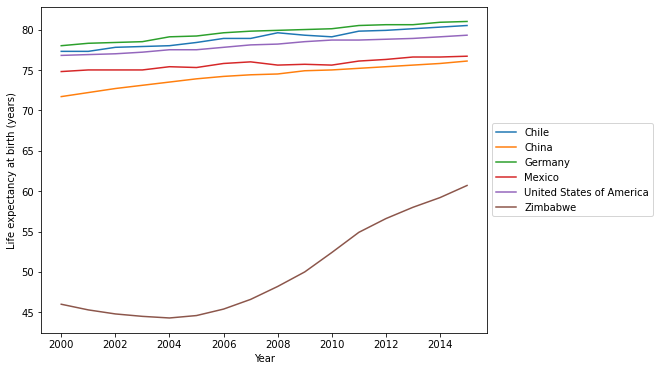

In [56]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LE, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

Plot GDP vs. Year time series for all 6 countries.
The GDP has grown over time for all 6 countries. Due to the differences in the scale of the GDP the lines for Chile, Mexico, and Zimbabwe appear to have no slope. 

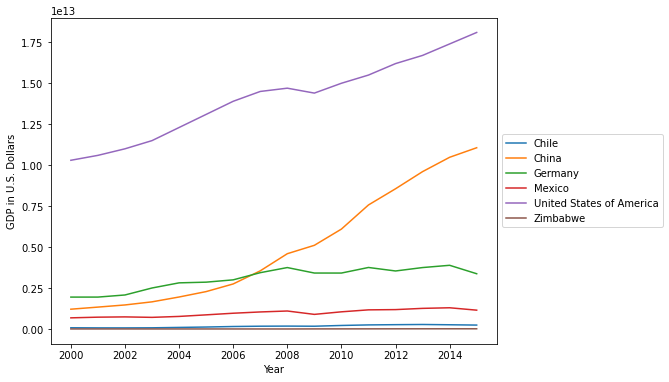

In [66]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in U.S. Dollars");

Zooming in on the lower part to see Chile, Mexico, and Zimbabwe more in detail.

(2000.0, 2014.0, 0.0, 1300000000000.0)

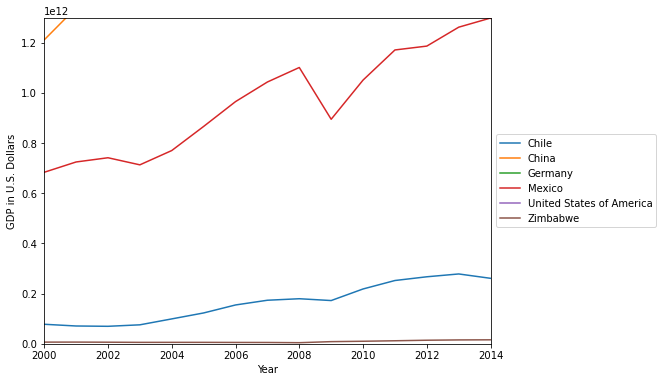

In [65]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in U.S. Dollars");
plt.axis([2000, 2014, 0, 0.13e13])